<a href="https://colab.research.google.com/github/imrealhelper/Linear-Algebra/blob/main/Linear_algebra_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np

n = 30
idependence_mode = False

def make_matrix(dependence_mode:bool):
  if dependence_mode:
    L = np.random.randn(n,n)
    L[-1,:] = np.random.randn(1) * np.sum(L[:n-1,:],axis=0)
  else:
    L = np.random.randn(n,n)
  return L

print(np.linalg.matrix_rank(make_matrix(True)))
print(np.linalg.matrix_rank(make_matrix(False)))

29
30


Integration result: (7.399967150723845, 8.215613912203428e-15)


<ipython-input-69-1b94ef94b345>:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  V_2[i] = quad(f, 0, L[i])[0]


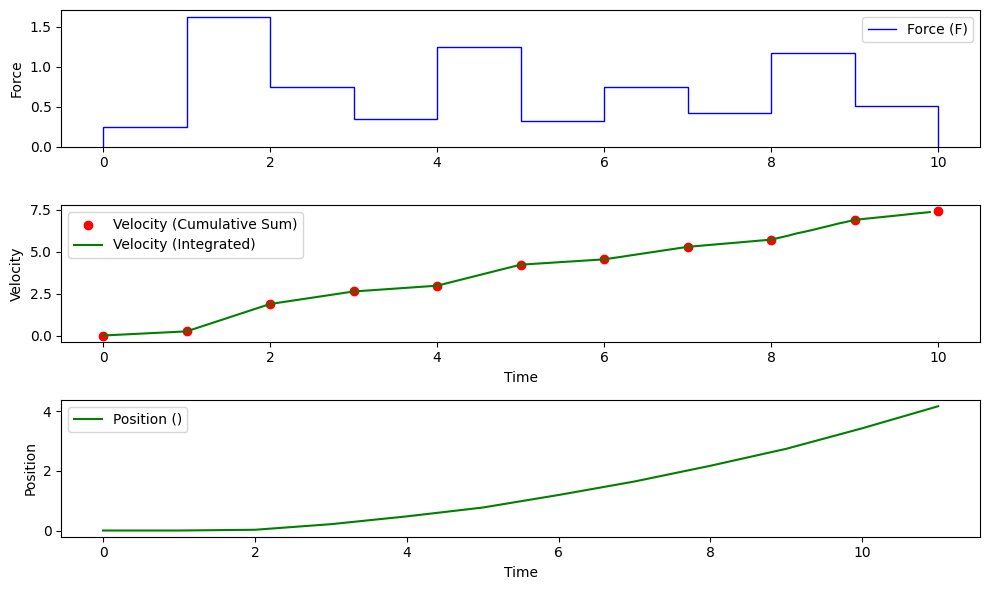

Final velocity from cumulative sum: 7.399967150723846
Final velocity from integration: 7.399967150723846


In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Generate force values (random but scaled)
F = np.abs(np.random.randn(10))


# Define the function for integration
def f(t):
    int_t = int(t)
    if int_t >= len(F):  # Handle out-of-bounds case
        return 0
    return F[int_t]

# Perform the integration from 0 to 10
result = quad(f, 0, 10)
print("Integration result:", result)

# Calculate velocity using cumulative sum
V_0 = 0
V = np.zeros(11)
V[1:] = V_0 + np.cumsum(F)
V[0] = V_0

# Define time steps
L = np.arange(0, 10, 0.1)

# Preallocate velocity array for integration over time
V_2 = np.zeros(len(L))

# Compute the integrated velocity at each time step
for i in range(len(L)):
    V_2[i] = quad(f, 0, L[i])[0]

# Instead of using quad for position, we use cumulative sum to speed it up
# The position is the integral of the velocity
X_2 = np.zeros(len(V)+1)
delta_t = L[1] - L[0]  # Time step for cumulative sum

# Compute position as the cumulative sum of velocity
X_2[1:] = np.cumsum(V) * delta_t  # Use cumulative sum to estimate position

# Create the plot
plt.figure(figsize=(10, 6))

# First subplot: Force over time
plt.subplot(3, 1, 1)
plt.stairs(F, label="Force (F)", color='b')
plt.ylabel("Force")
plt.legend()

# Second subplot: Velocity over time
plt.subplot(3, 1, 2)
plt.scatter(range(len(V)), V, label="Velocity (Cumulative Sum)", color='r')
plt.plot(L, V_2, label="Velocity (Integrated)", color='g')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()

# Third subplot: Position over time (using faster method)
plt.subplot(3, 1, 3)
plt.plot(range(len(V)+1), X_2, label="Position ()", color='g')
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print final velocity value
print("Final velocity from cumulative sum:", V[-1])
print("Final velocity from integration:", np.ones(10) @ F + V_0)


<ipython-input-72-02620cc088d3>:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result = quad(f, 0, 10)
<ipython-input-72-02620cc088d3>:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator shou

Integration result: (7.164776351949219, 0.03719386664529445)


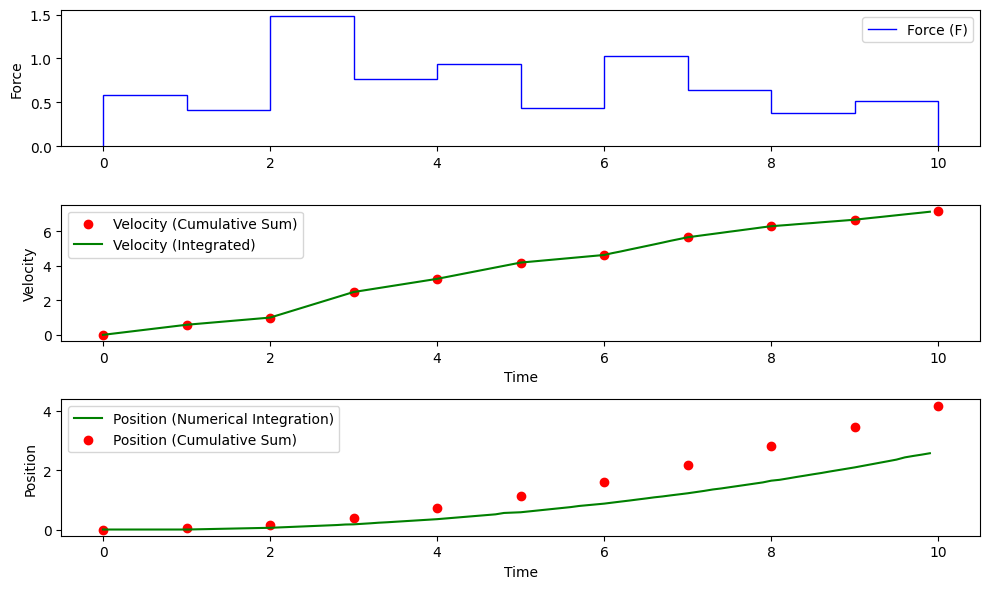

Final velocity from cumulative sum: 7.1692922884639
Final velocity from integration: 7.1692922884639


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Generate force values (random but scaled)
F = np.abs(np.random.randn(10))

# Define the function for integration
def f(t):
    int_t = int(t)
    if int_t >= len(F):  # Handle out-of-bounds case
        return 0
    return F[int_t]

# Perform the integration from 0 to 10
result = quad(f, 0, 10)
print("Integration result:", result)

# Calculate velocity using cumulative sum
V_0 = 0
V = np.zeros(11)
V[1:] = V_0 + np.cumsum(F)
V[0] = V_0

# Define time steps
L = np.arange(0, 10, 0.1)

# Preallocate velocity array for integration over time
V_2 = np.zeros(len(L))

# Compute the integrated velocity at each time step
for i in range(len(L)):
    V_2[i] = quad(f, 0, L[i])[0]

# Add numerical integration for position based on velocity (V_2)
def velocity(t):
    int_t = int(t)
    if int_t >= len(V_2):
        return 0
    return V_2[int_t]

# Preallocate position array for integration over time using numerical integration
X_num_integral = np.zeros(len(L))

# Compute position as the integral of velocity at each time step
for i in range(len(L)):
    X_num_integral[i] = quad(velocity, 0, L[i])[0]

delta_t = L[1] - L[0]  # Time step for cumulative sum

# Compute position as the cumulative sum of velocity
X_2 = np.cumsum(V) * delta_t  # Use cumulative sum to estimate position

# Create the plot
plt.figure(figsize=(10, 6))

# First subplot: Force over time
plt.subplot(3, 1, 1)
plt.stairs(F, label="Force (F)", color='b')
plt.ylabel("Force")
plt.legend()

# Second subplot: Velocity over time
plt.subplot(3, 1, 2)
plt.scatter(range(len(V)), V, label="Velocity (Cumulative Sum)", color='r')
plt.plot(L, V_2, label="Velocity (Integrated)", color='g')
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.legend()

# Third subplot: Position over time (using numerical integration and cumulative sum)
plt.subplot(3, 1, 3)
plt.plot(L, X_num_integral, label="Position (Numerical Integration)", color='g')
plt.scatter(range(len(V)), X_2, label="Position (Cumulative Sum)", color='r')
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Print final velocity value
print("Final velocity from cumulative sum:", V[-1])
print("Final velocity from integration:", np.ones(10) @ F + V_0)
